# music 03

![synthesizer](https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fwww.kidnepro.com%2Fmobile%2Farturia%2Fimages%2Fmoog-modular-v-sounds-mobile%2FMoogModular-1.jpg&f=1&nofb=1&ipt=7be8b44fc729536189f72f50b6307790219a9088428f78976487dd4297a17c6e&ipo=images)

Negli esempi "music" presenteremo la natura del segnale digitale usando l'audio di Colab. Nell'opzione Telecomunicazioni si tratta di qyesto ed altro!

## riferimenti

[1] "Simple Audio Processing in Python With Pydub" di Jamie Bullock [qui](https://betterprogramming.pub/simple-audio-processing-in-python-with-pydub-c3a217dabf11).  
[2] Audio Processing su YouTube [qui](https://www.youtube.com/watch?v=-mlIsOl_D_Q), un foglio CoLab [qui](https://colab.research.google.com/drive/1pkeMzy6g29pHtFmG1yltpOavGVdY0B60#scrollTo=Tl92AuZoYWCD).  
[3] PyDub [qui](https://github.com/jiaaro/pydub/), la nostra libreria audio.  
[4] IPython [qui](https://ipython.org/) per sfruttare al meglio CoLab, come ad esempio fargli suonare i file `wav`.  
[5] TinyUrl [qui](https://tinyurl.com/app) per gestirei link in modo semplice.  
[6] MatPlotLib [qui](https://matplotlib.org/stable/index.html).

## il primo strumento: un segnale sinusoidale

Ora procediamo noi a costruire un nostro strumento musicale. Per far ciò abbiamo bisogno di parlare di segnali. 

In [1]:
!pip install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Partiamo da una **sinusoide**. `Sine` e`un **generatore di segnale** e dobbiamo trasformarlo in un segmento audio.

In [68]:
import IPython # solo in CoLab
# from pydub import AudioSegment
from pydub.generators import Sine

gen = Sine(440)
la = gen.to_audio_segment(duration=500)

la.export("la.wav", format="wav")
IPython.display.Audio("la.wav")

Questo è il tono dei telefoni analogici, quelli che oramai si vedono nei film. Ora vediamo un po' cosa abbiamo creato plottando il grafico.

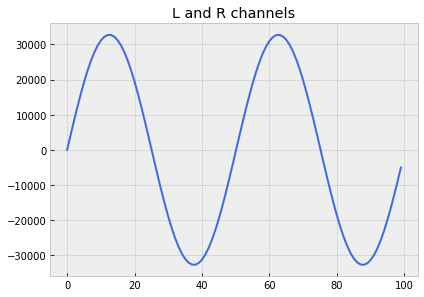

In [69]:
import matplotlib.pyplot as plt

signal = la.get_array_of_samples()
channel_left = signal[0::2]
channel_right = signal[1::2]
plt.style.use('bmh')
plt.plot(channel_left[0:100], color="royalblue")
# plt.plot(channel_right[0:100] , color="tomato")
plt.tight_layout()
plt.title('L and R channels')
plt.show()

## una scala, la nostra prima composizione

Suoniamo qualcosa! col nostro strumento

In [65]:
import IPython 
from pydub import AudioSegment
from pydub.generators import Sine

# un AudioSegment vuoto (in silenzio per 0ms)
result = AudioSegment.silent(duration = 0) 
# loop
for n in range(15):    
    gen = Sine(220 * n)
    # creiamo un audio segment    
    sine  = gen.to_audio_segment(duration=250)  
    # diminuiamo di 3Db 
    sine = sine.apply_gain(-3)
    # fade all'inizio ed alla fine di 50ms
    sine = sine.fade_in(50).fade_out(100) 
    # aggiungiamo al risultato
    result += sine

result.export("result.wav", format="wav")
IPython.display.Audio("result.wav")



## es001

Cercare in rete come erano i segnali di "libero" ed "occupato" dei vecchi segnali analogici e riprodurre il suono.

In [ ]:
# es001


## sintesi additiva: somma di armoniche

Per **armoniche** intendiamo sinusoidi. Osserviamo che le prime tre armoniche sono in proporzione, avremo quindi un LA più rucco. La quarta armonico viola tale regola dando un effetto di **vibrato**, perché ciò accada lo vedremo quando parleremo di battimenti! Abbiamo quindi un suono tipo calcson.

In [25]:
import IPython 
from pydub.generators import Sine
from pydub.effects import normalize

# volume -4 db
harmonic1 = Sine(440).to_audio_segment(duration=1000, volume = -4)
harmonic2 = Sine(880).to_audio_segment(duration = 1000, volume = -10)
harmonic3 = Sine(1320).to_audio_segment(duration = 1000, volume = -16)  
harmonic4 = Sine(1380).to_audio_segment(duration = 1000, volume = -18) 
result  = harmonic1.overlay(harmonic2)
result  = result.overlay(harmonic3)
result  = result.overlay(harmonic4)
# result = normalize(result)
result = result.fade_in(10).fade_out(100)


result.export("result.wav", format="wav")
IPython.display.Audio("result.wav")

Ora vediamo di vedere come è fatta l'onda, toglieremo i due *fade*.

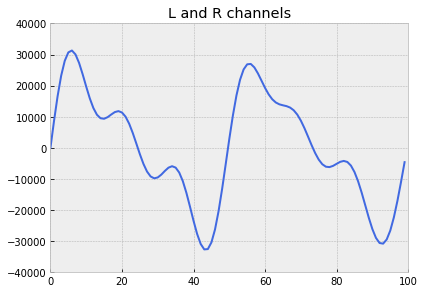

In [17]:
import IPython 
from pydub.generators import Sine
from pydub.effects import normalize
import matplotlib.pyplot as plt

harmonic1 = Sine(440).to_audio_segment(duration=1000, volume = -4)
harmonic2 = Sine(880).to_audio_segment(duration = 1000, volume = -10)
harmonic3 = Sine(1320).to_audio_segment(duration = 1000, volume = -16)  
harmonic4 = Sine(1380).to_audio_segment(duration = 1000, volume = -18)    
result  = harmonic1.overlay(harmonic2)
result  = result.overlay(harmonic3)
result  = result.overlay(harmonic4)
# result = normalize(result)

signal = result.get_array_of_samples()
channel_left = signal[0::2]
channel_right = signal[1::2]
plt.style.use('bmh')
plt.axis([0, 100, -40000, 40000])
plt.plot(channel_left[0:100], color="royalblue")
# plt.plot(channel_right[0:100] , color="tomato")
plt.tight_layout()
plt.title('L and R channels')
plt.show()

# onda quadra

Abbiamo a disposizione altri generatori, ecco come suona un **onda quadra**.

In [62]:
import IPython 
from pydub.generators import Square

gen = Square(440)
la = gen.to_audio_segment(duration=500) - 10

la.export("la.wav", format="wav")
IPython.display.Audio("la.wav")

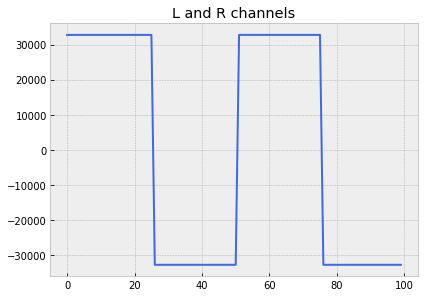

In [60]:
import matplotlib.pyplot as plt

signal = la.get_array_of_samples()
channel_left = signal[0::2]
channel_right = signal[1::2]
plt.style.use('bmh')
plt.plot(channel_left[0:100], color="royalblue")
# plt.plot(channel_right[0:100] , color="tomato")
plt.tight_layout()
plt.title('L and R channels')
plt.show()



## battimenti

Questo è un interessantissimo fenomeno che si ha quando due sinusoidi di eguale ampiezza sono somate su frequenze molto vicine.

In [67]:
import IPython 
from pydub.generators import Sine
from pydub.effects import normalize

f1 = 400
f2 = 402
harmonic1 = Sine(f1).to_audio_segment(duration = 4000, volume = -10)
harmonic2 = Sine(f2).to_audio_segment(duration = 4000, volume = -10)
result  = harmonic1.overlay(harmonic2)
# result = normalize(result)
result = result.fade_in(10).fade_out(100)
print(f'frequenza di battimento = {(f2-f1)/2}\n')


result.export("result.wav", format="wav")
IPython.display.Audio("result.wav")

frequenza di battimento = 1.0

